# Banking Fraud Detection using Blockchain and AIML Models

## Data wrangling and Visualization

### Import Libraries

In [3]:
!pip install matplotlib seaborn numpy pandas scipy



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
client= pd.read_csv("datasets/client.csv",sep=";")
card= pd.read_csv("datasets/card.csv",sep=";")
disp= pd.read_csv("datasets/disp.csv",sep=";")

### Preliminary Glance of Data

In [3]:
client.info()
client.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   client_id     5369 non-null   int64
 1   birth_number  5369 non-null   int64
 2   district_id   5369 non-null   int64
dtypes: int64(3)
memory usage: 126.0 KB


,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


(5369, 3)


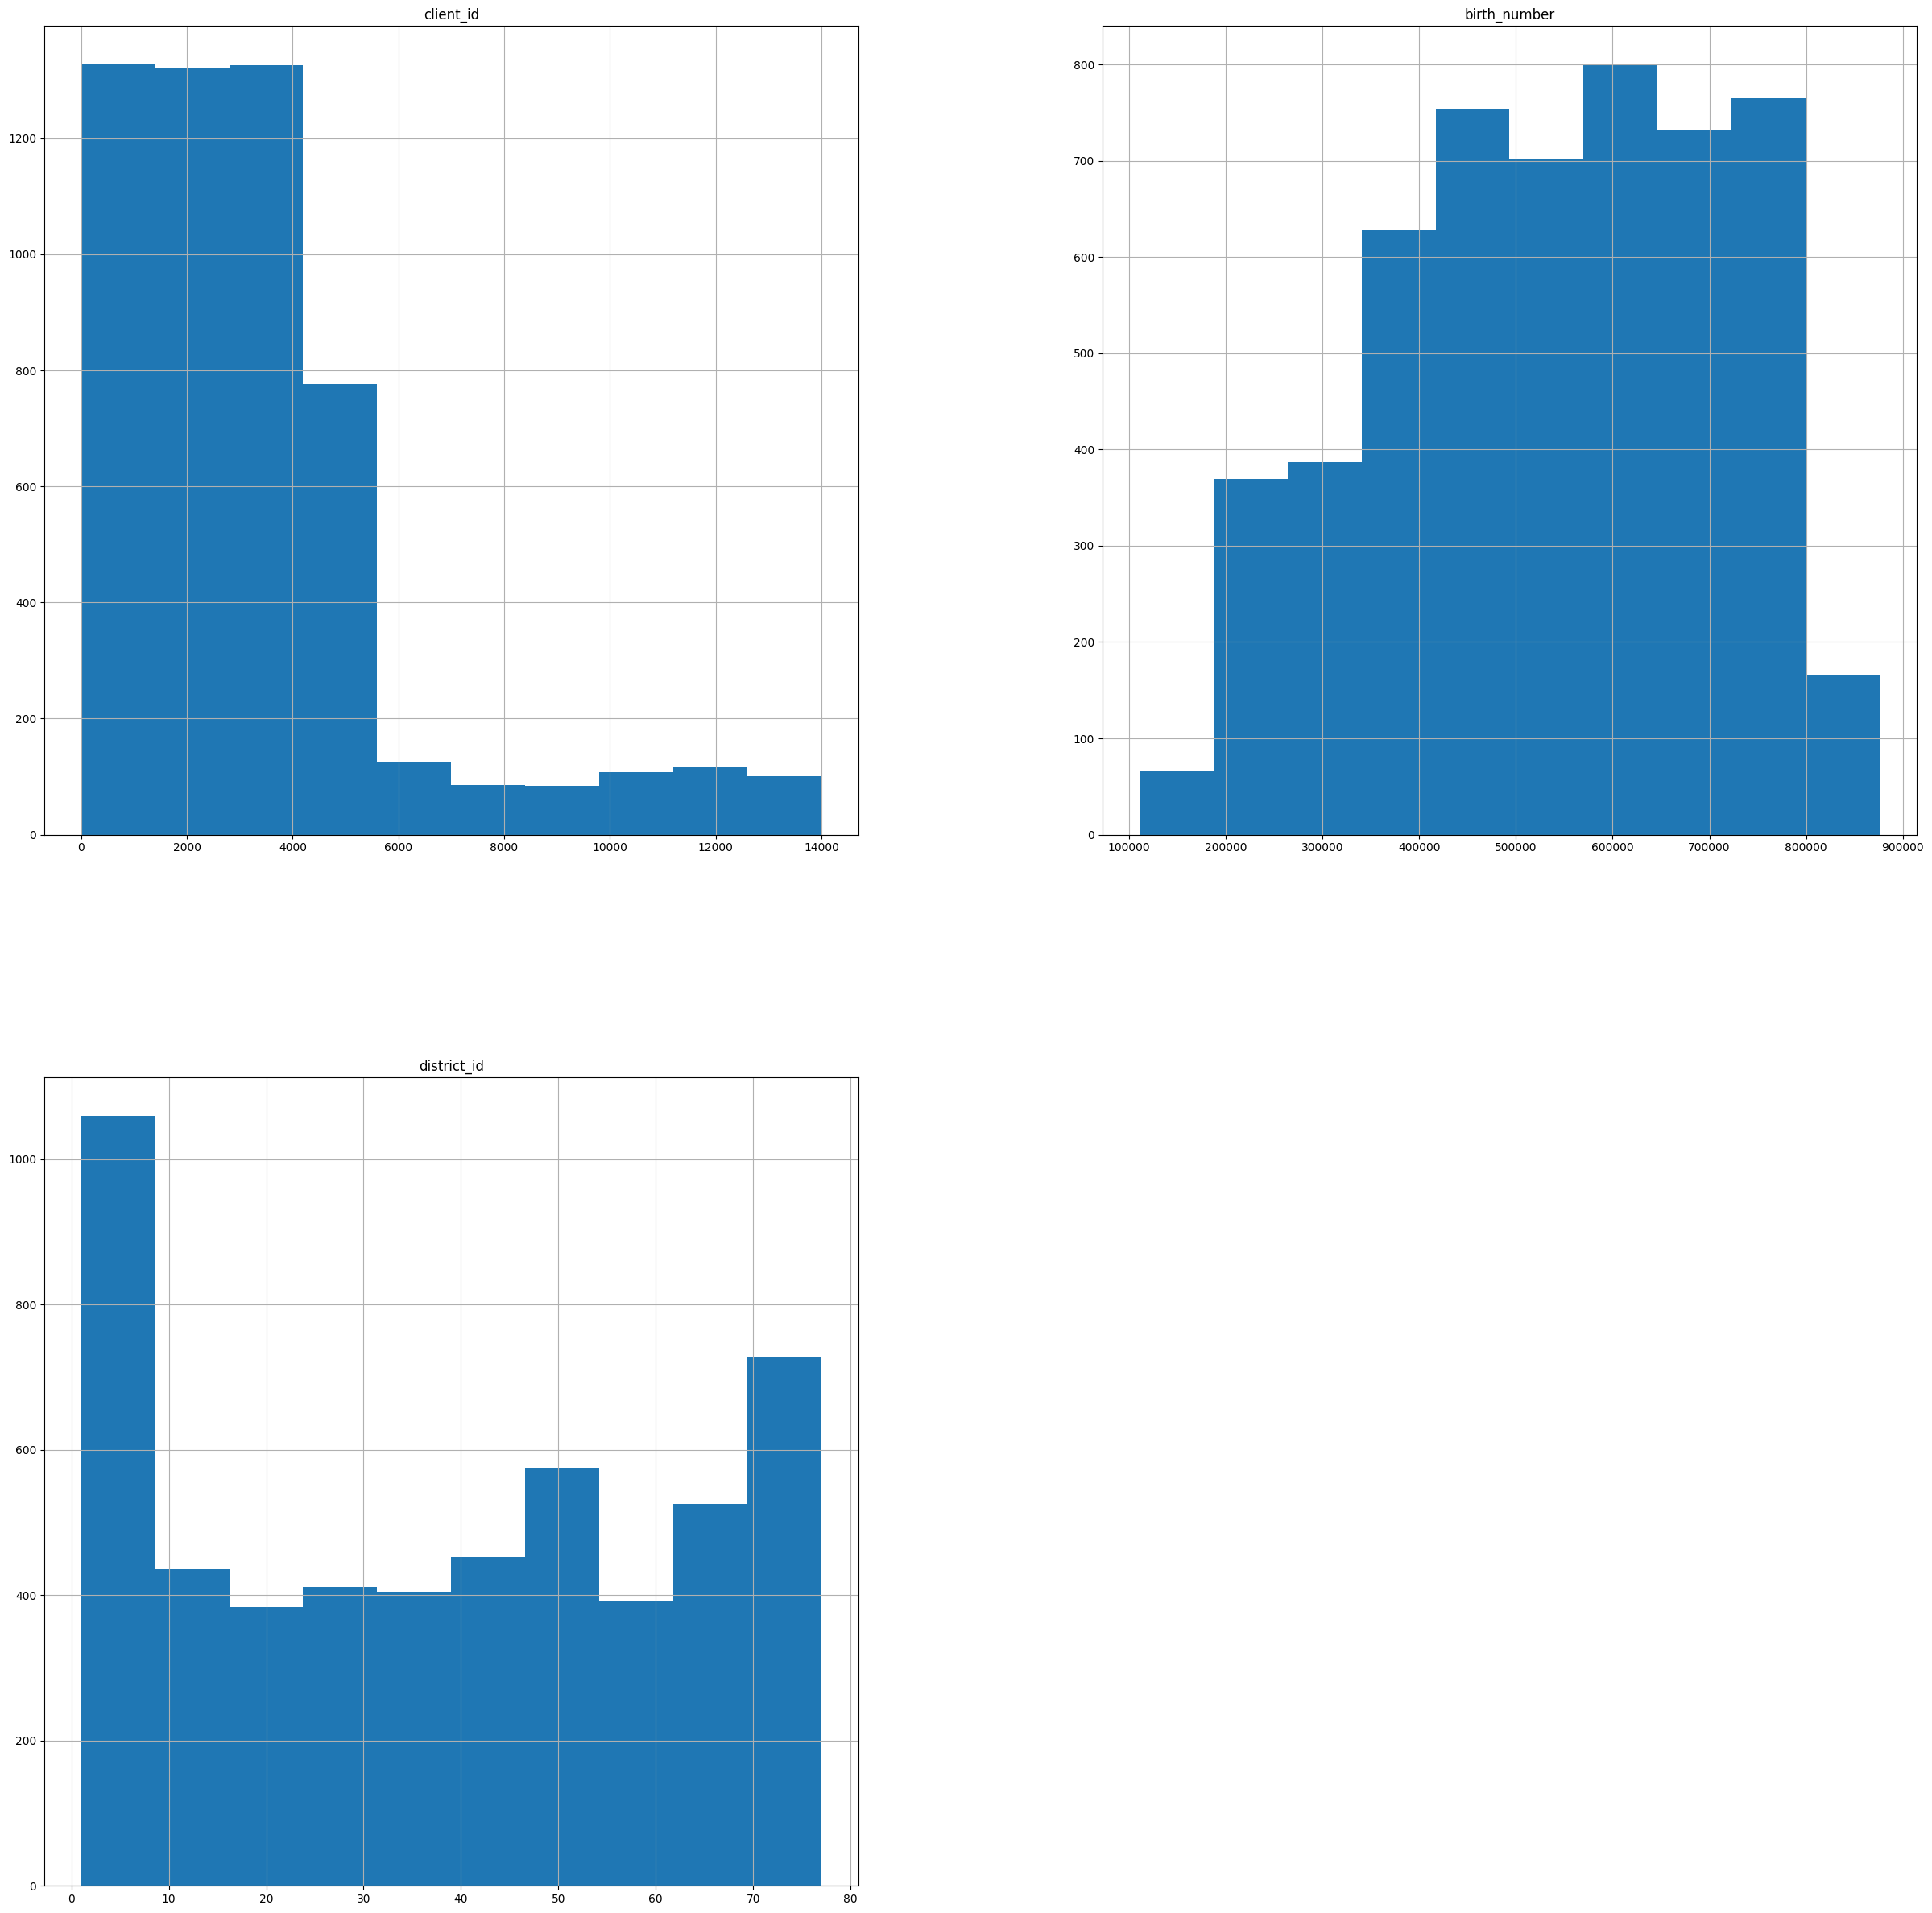

In [4]:
#Visualization
print(client.shape)
client.hist(figsize=(30,30))
plt.show()

In [ ]:
card.info()
card.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   int64 
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   date         4500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 140.8+ KB


,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


(892, 4)


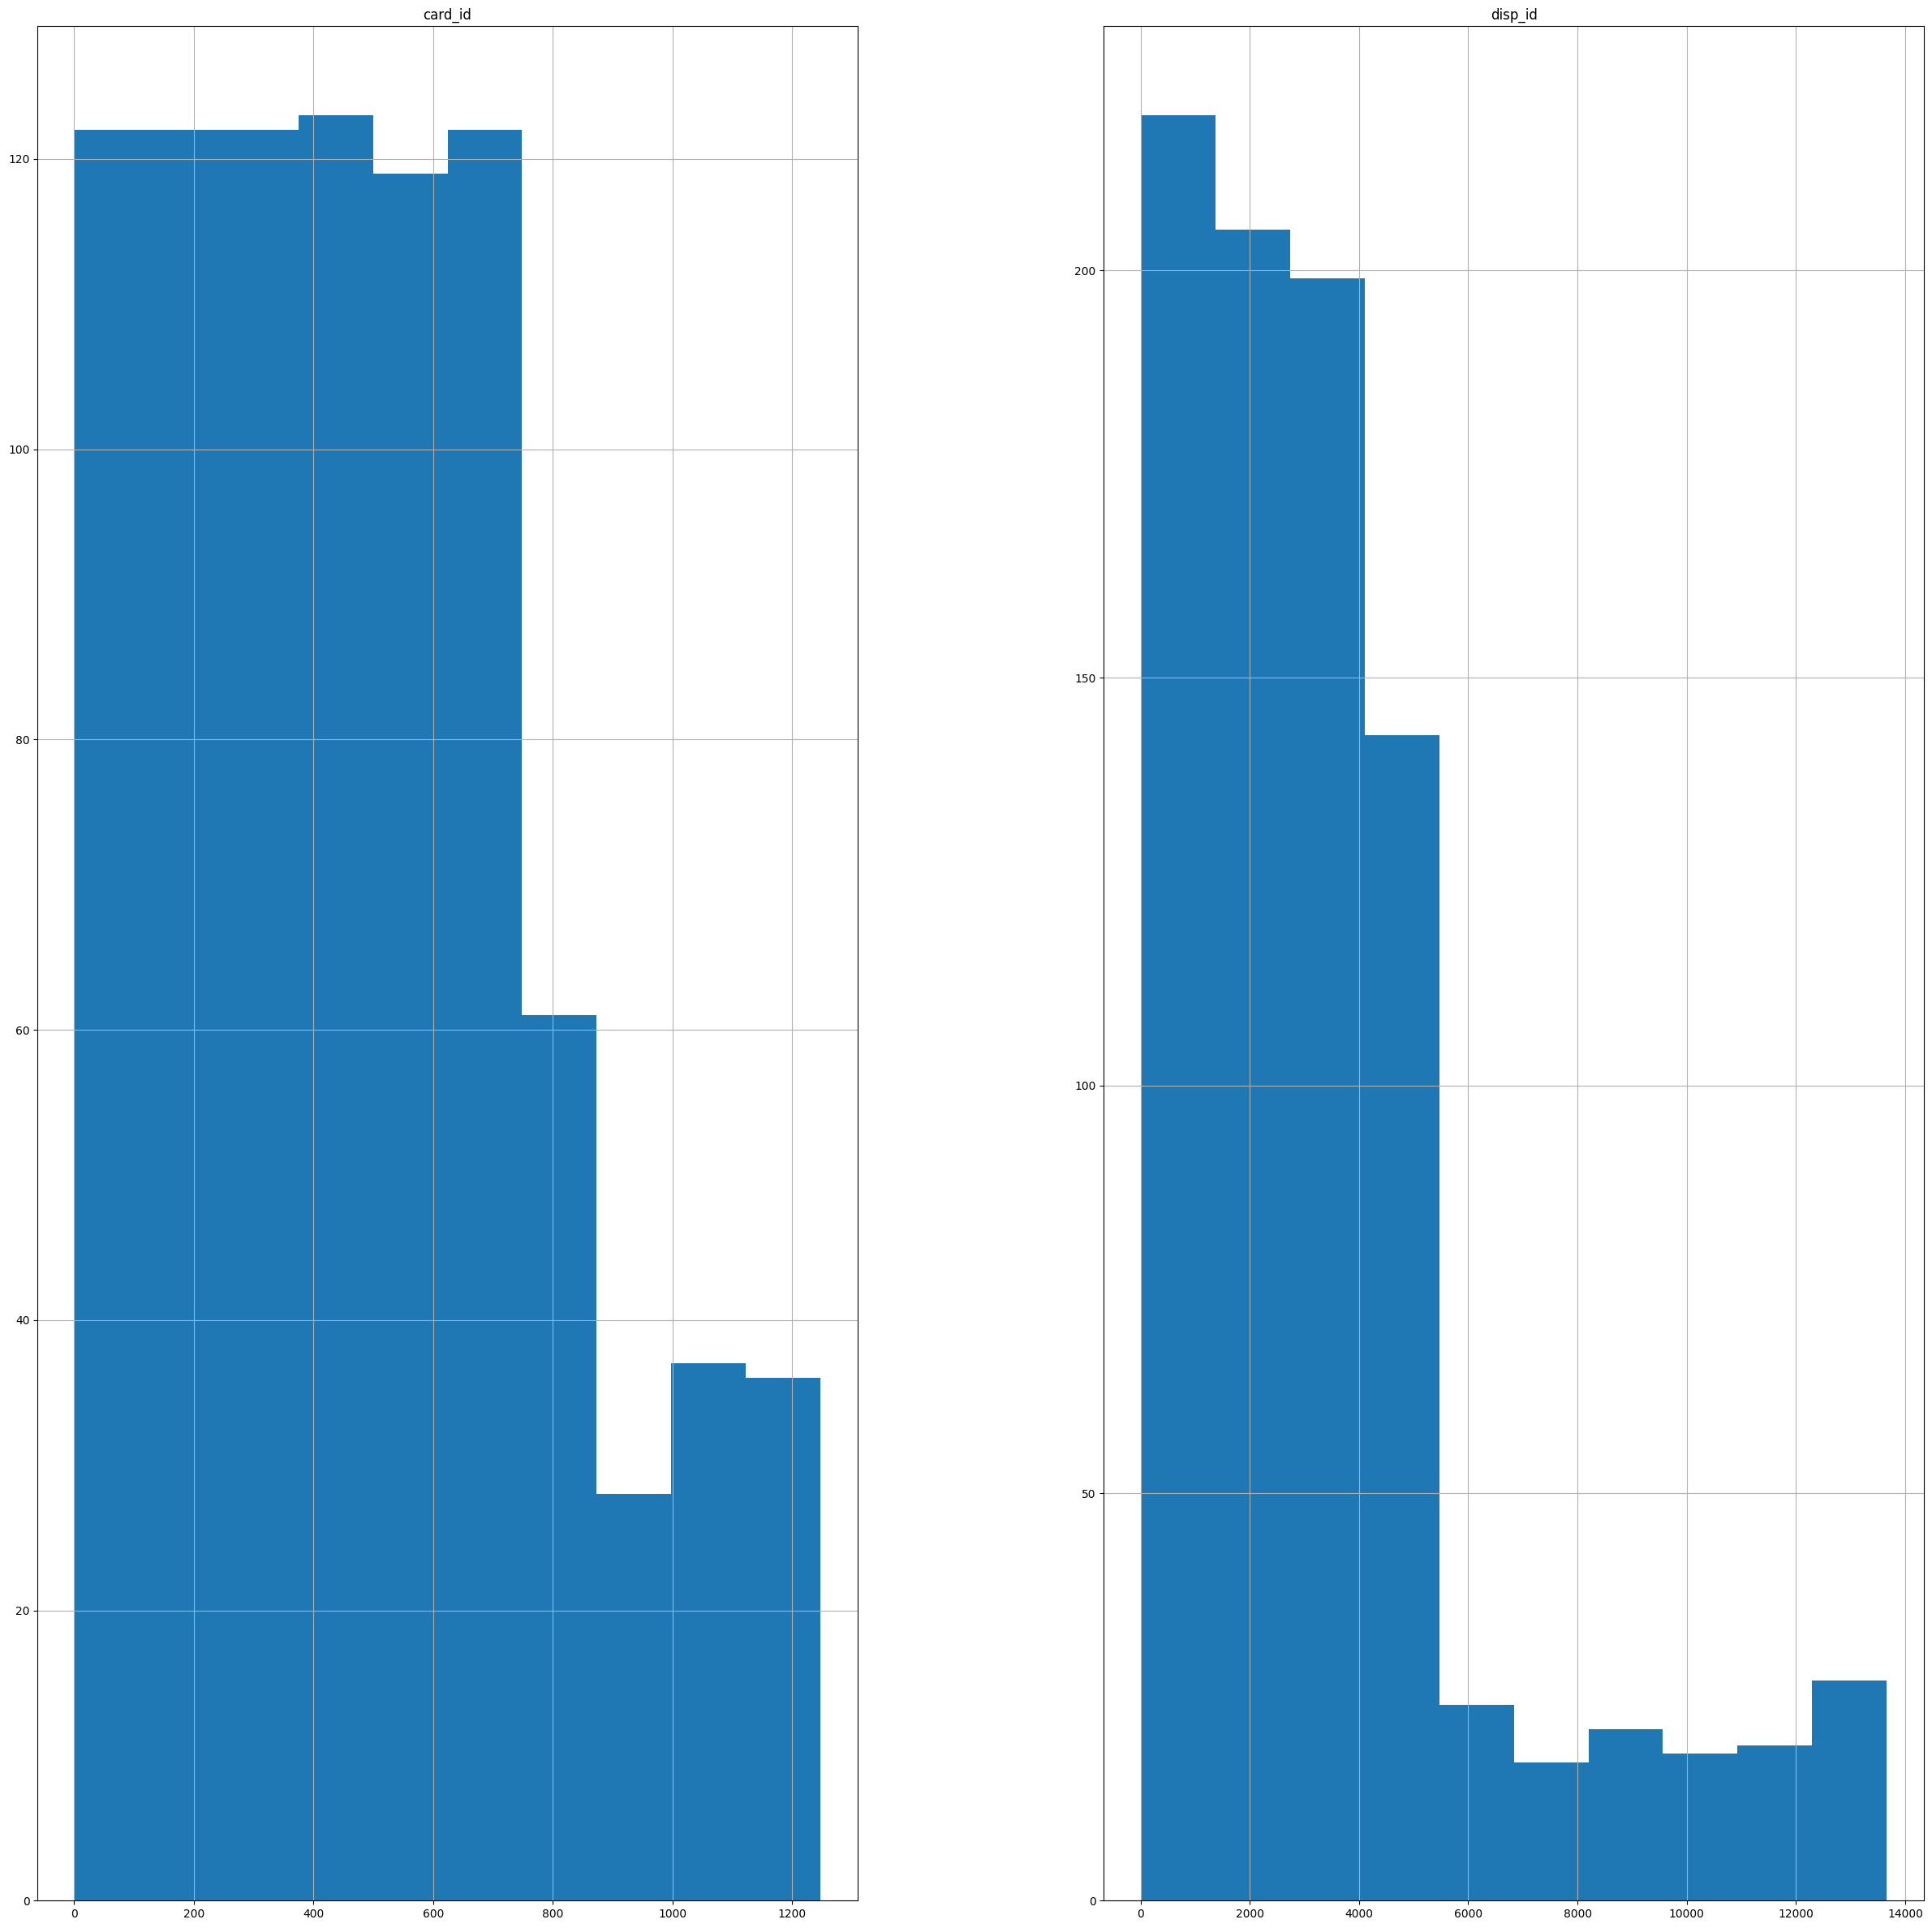

In [5]:
#visualization
print(card.shape)
card.hist(figsize=(30,30))
plt.show()

In [6]:
disp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   disp_id     5369 non-null   int64 
 1   client_id   5369 non-null   int64 
 2   account_id  5369 non-null   int64 
 3   type        5369 non-null   object
dtypes: int64(3), object(1)
memory usage: 167.9+ KB


(5369, 4)


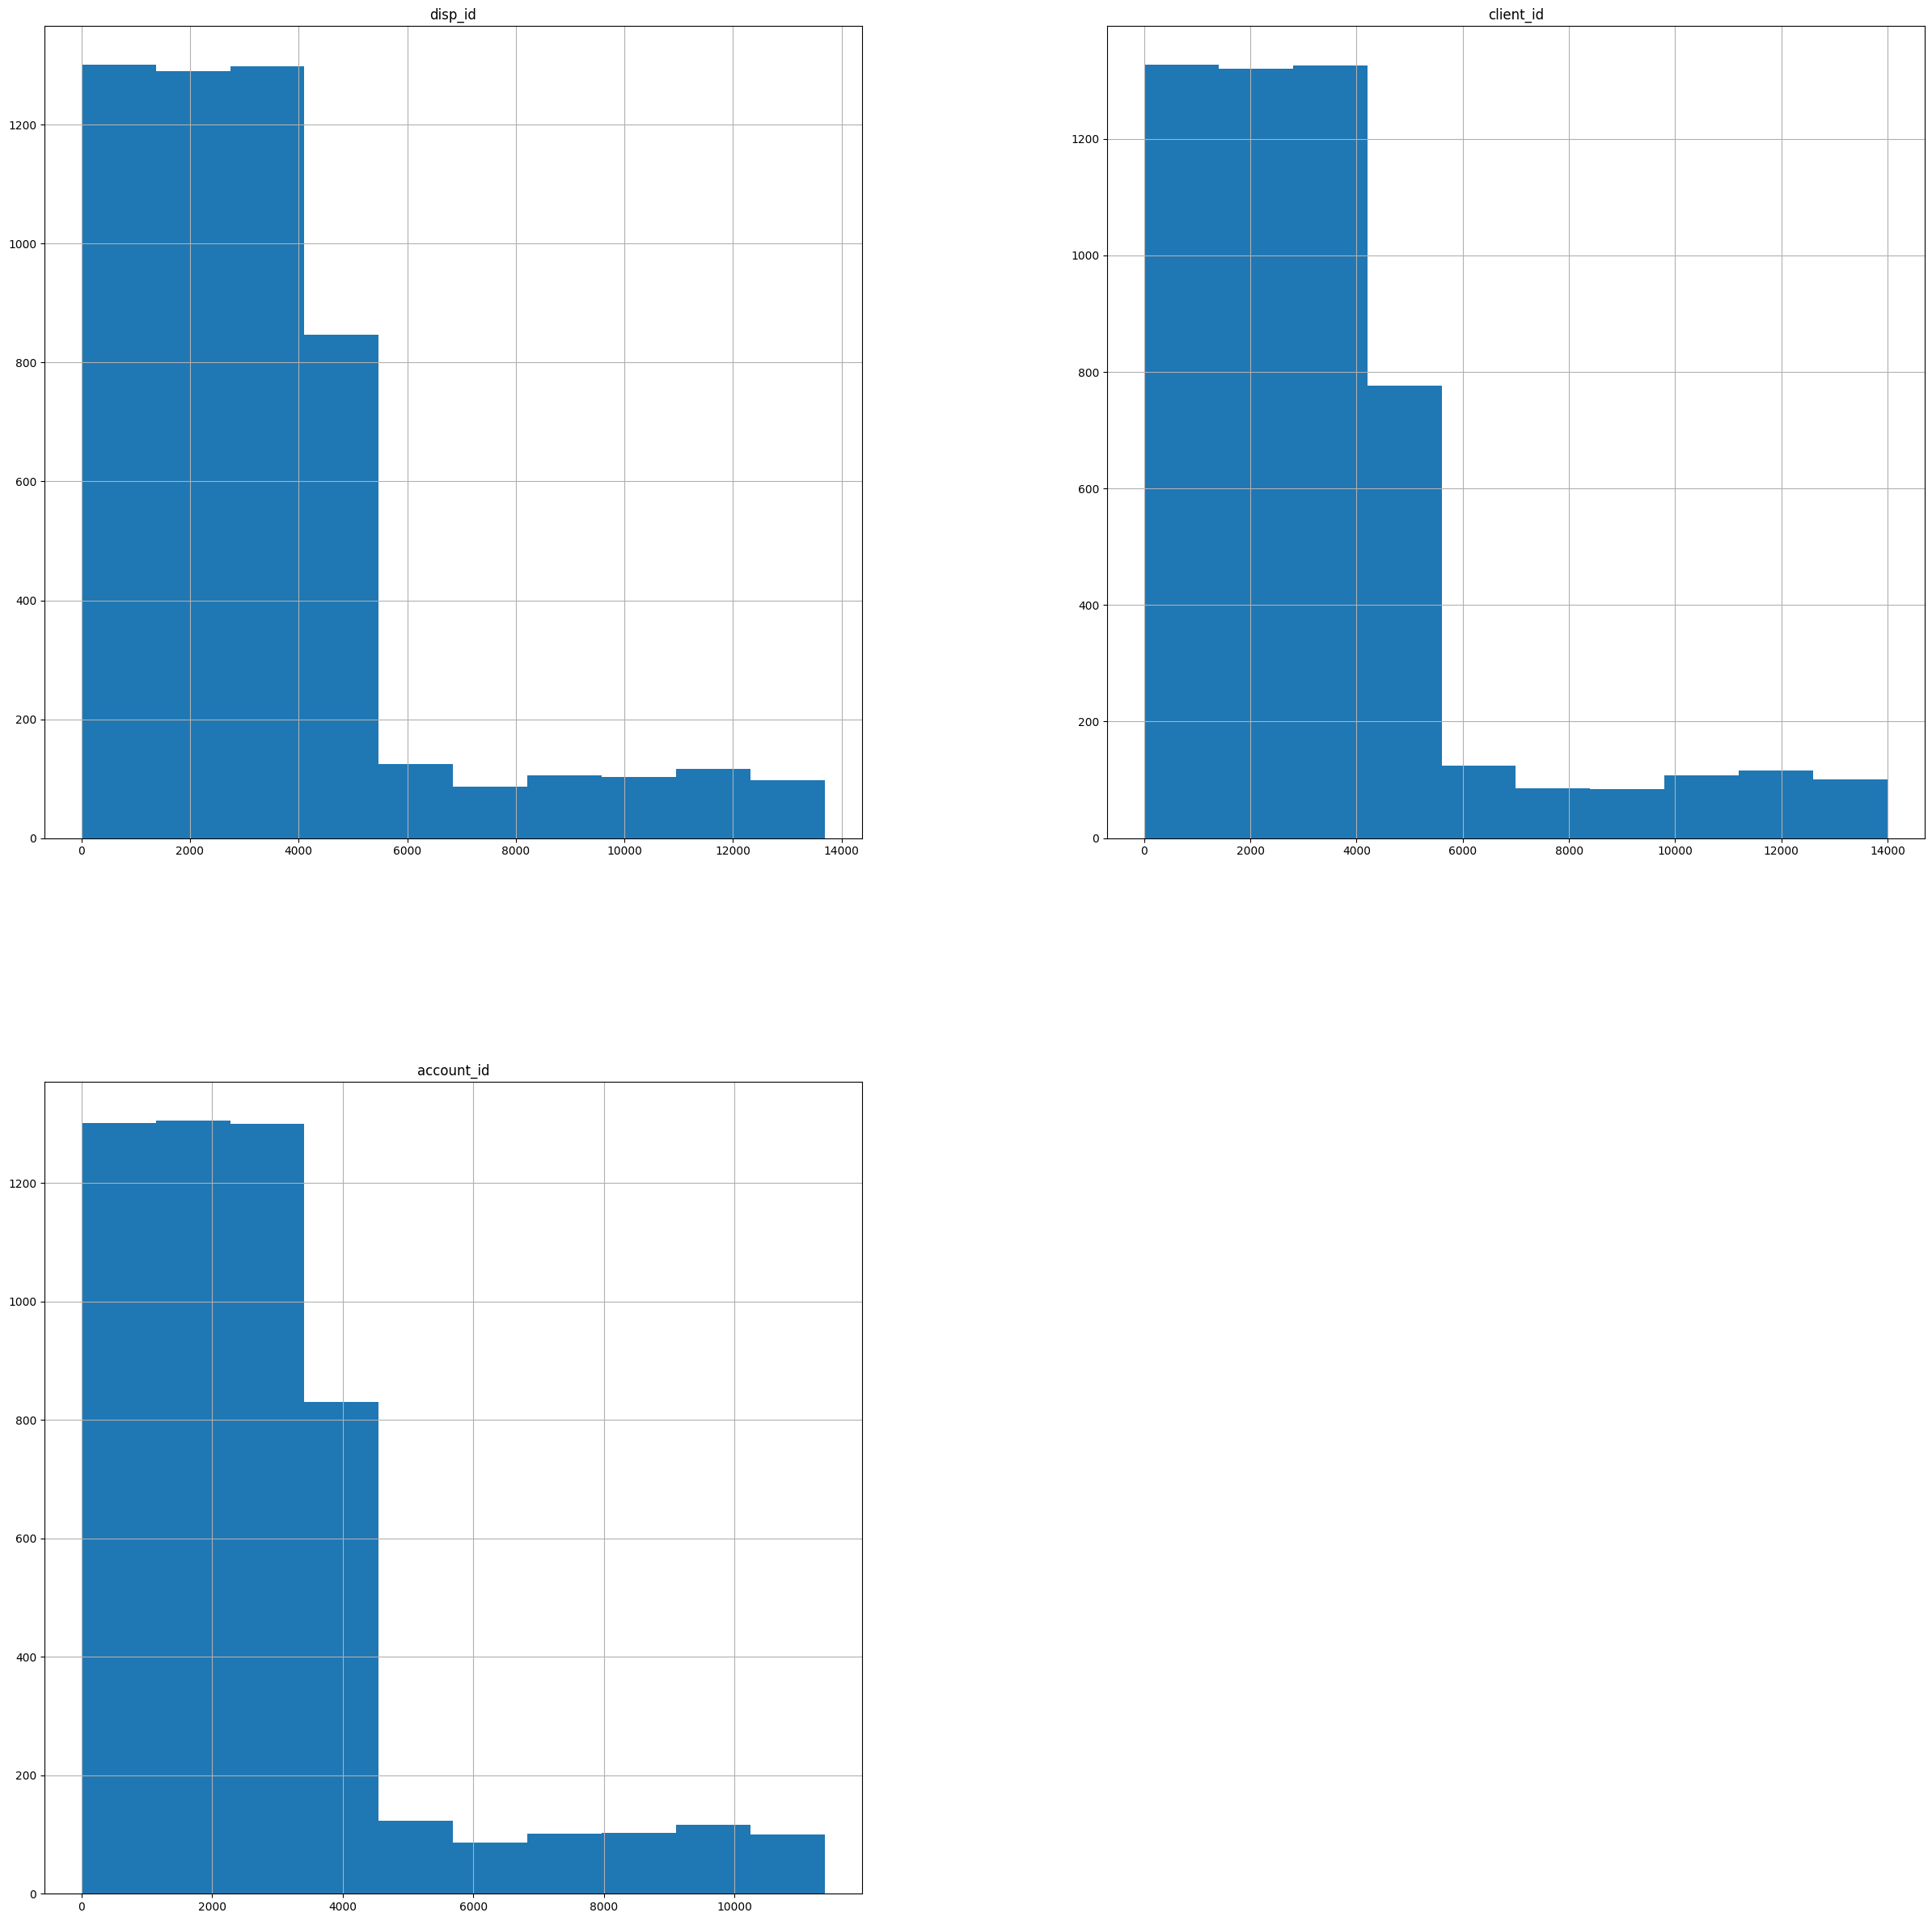

In [7]:
#visualization
print(disp.shape)
disp.hist(figsize=(30,30))
plt.show()

#### View Columns

In [8]:
client.head()

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [ ]:
client.head()

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [ ]:
disp.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


There are a lot of Nan values in the 'transaction.csv' file. To avoid future errors, I'll remove all the NaN values from each file.

#### Check for Missing Values

In [9]:
#order
def missing_order():
    missing = client.columns[client.isnull().any()].tolist()
    return missing

In [10]:
disp[missing_order()].isnull().sum()

Series([], dtype: float64)

In [11]:
#account
def missing_account():
    missing = card.columns[card.isnull().any()].tolist()
    return missing

In [12]:
card[missing_account()].isnull().sum()

Series([], dtype: float64)

In [13]:
#transaction
def missing_transaction():
    missing = disp.columns[disp.isnull().any()].tolist()
    return missing

In [14]:
disp[missing_transaction()].isnull().sum()

Series([], dtype: float64)

There is one missing value in row 183114 of the 'operation' column another one in row 481881 of the 'k_symbol' column

#### Data Cleaning

#### 1) Handling NaN values by dropping them.

In [16]:
client = client.dropna()

In [15]:
card= card.dropna()

In [17]:
disp= disp.dropna()

### Visualize Data

<Axes: >

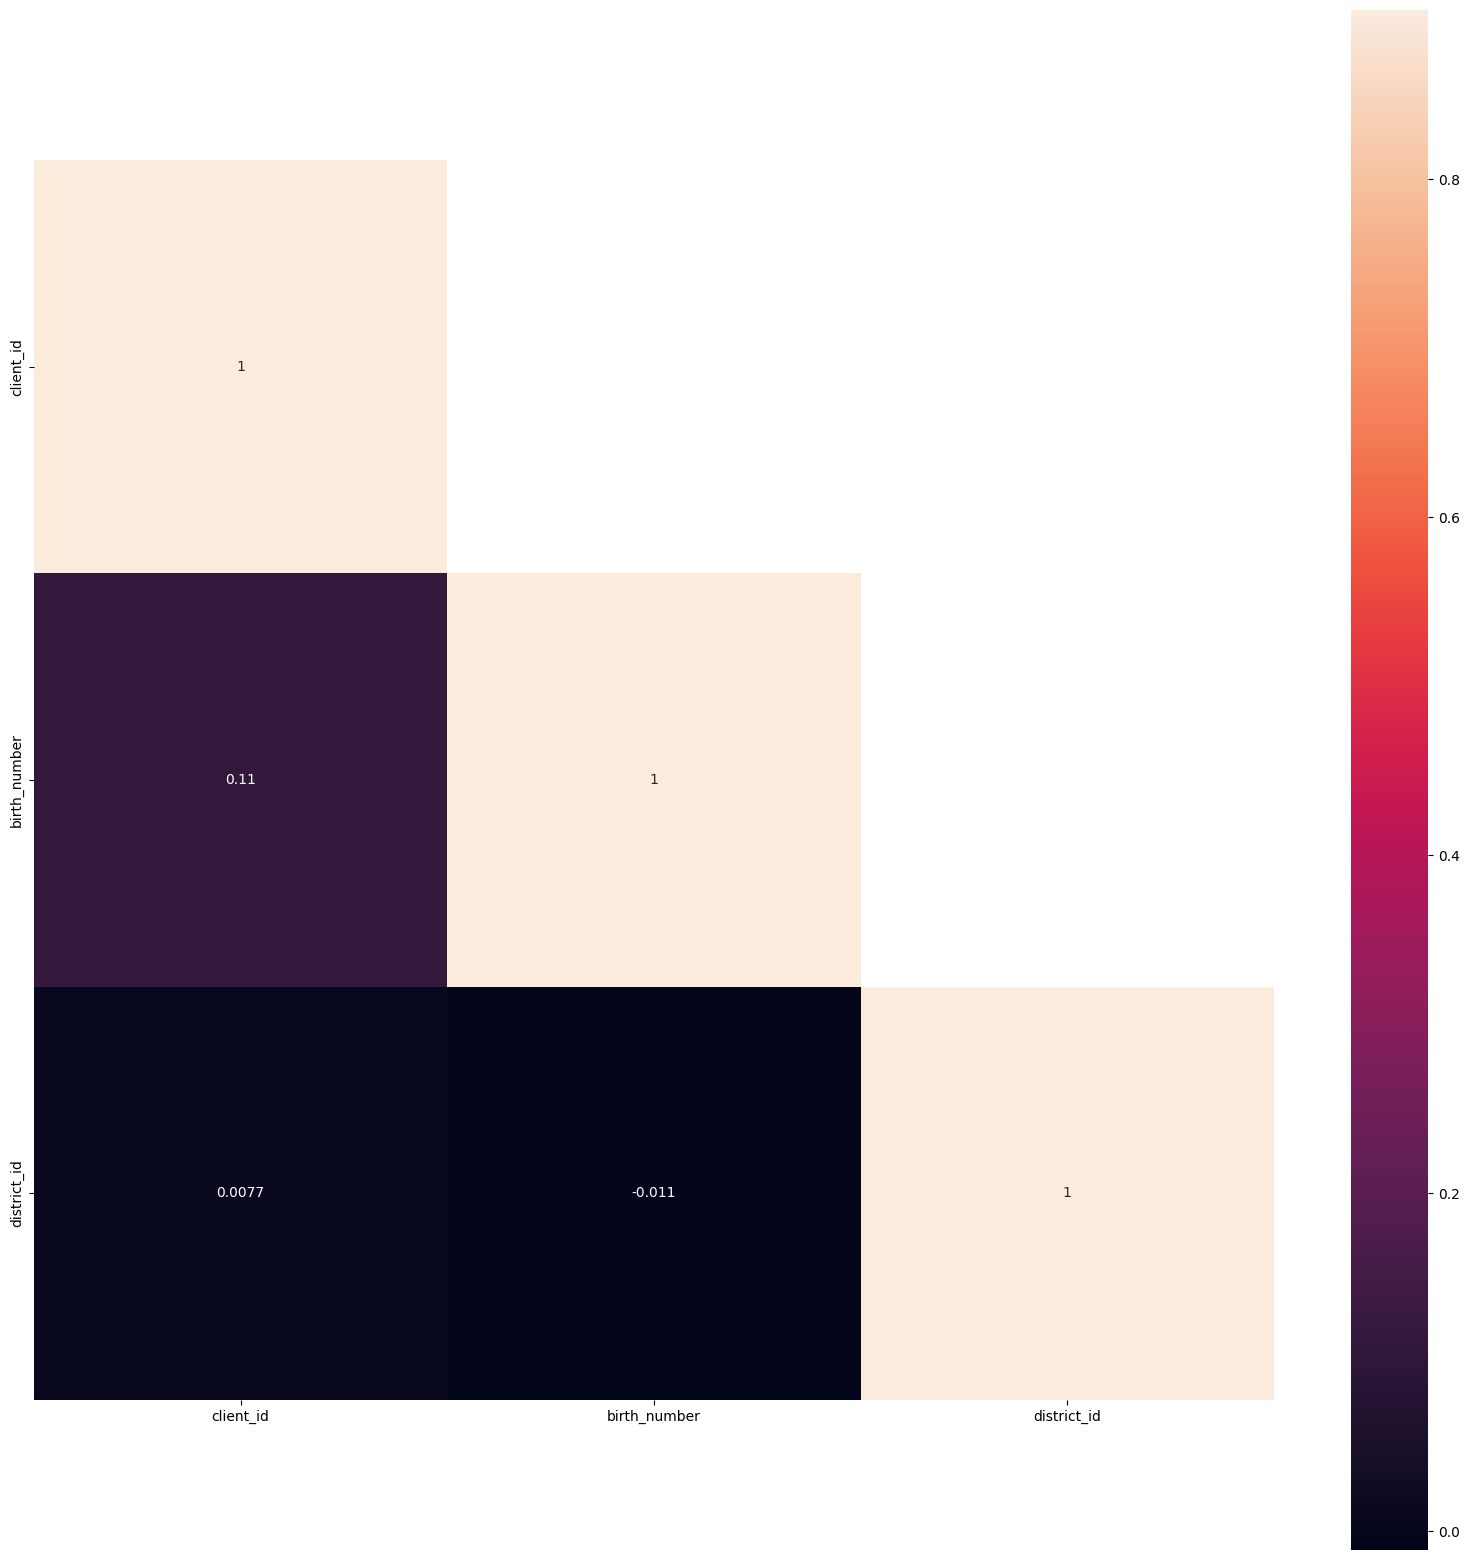

In [18]:
#corelation for order.csv
client_numeric=client.select_dtypes(include="number")
client_corr = client_numeric.corr(method = 'pearson')
mask = np.array(client_corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,20)
sns.heatmap(client_corr, mask = mask, vmax = 0.9, square = True, annot = True)

<Axes: >

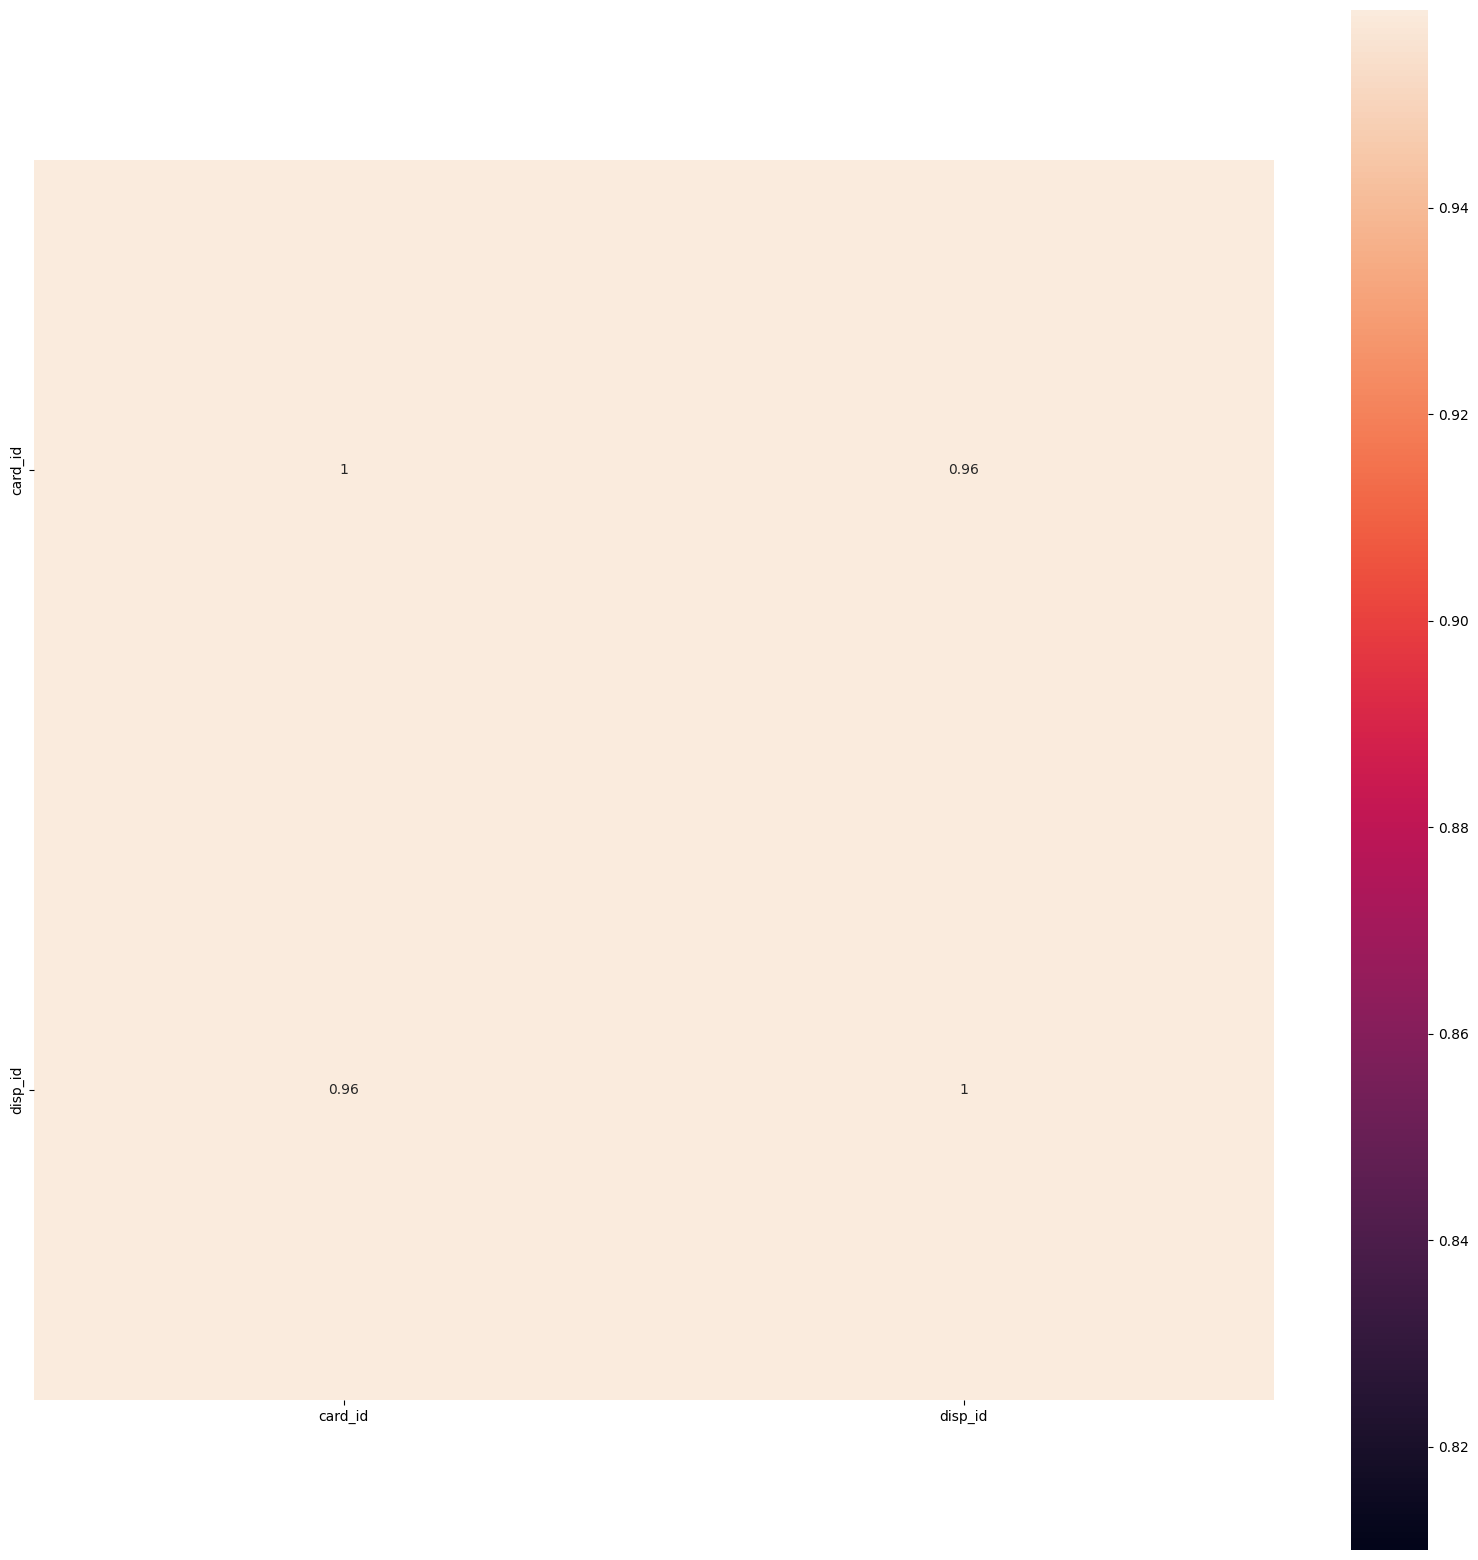

In [19]:
#corelation for account.csv
card_numeric=card.select_dtypes(include=np.number)
card_corr = card_numeric.corr(method = 'pearson')
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,20)
sns.heatmap(card_corr, vmax = 0.9, square = True, annot = True)

<Axes: >

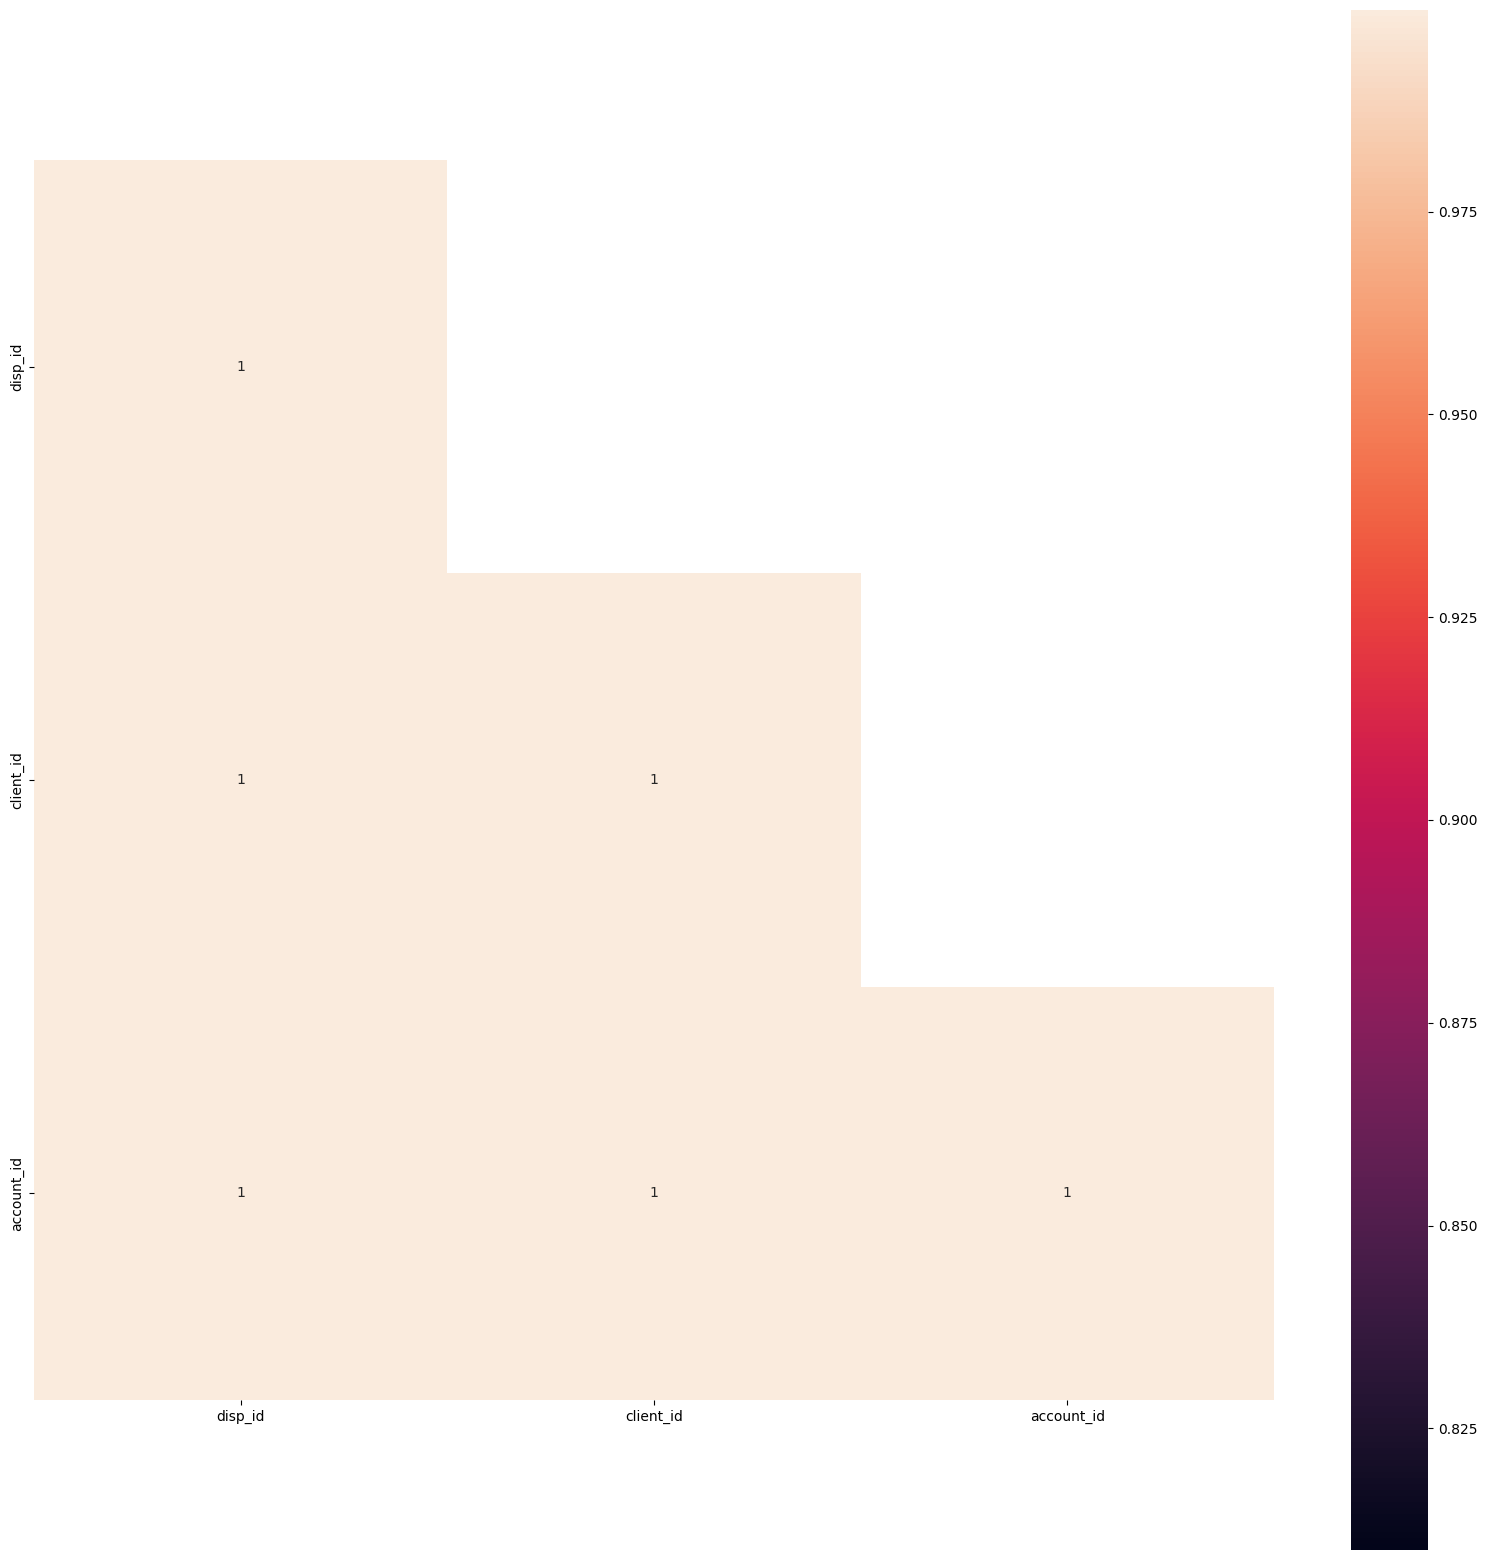

In [20]:
#corelation for transaction.csv
disp_numeric=disp.select_dtypes(include="number")
disp_corr = disp_numeric.corr(method = 'pearson')
mask = np.array(disp_corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,20)
sns.heatmap(disp_corr, mask = mask, vmax = 0.9, square = True, annot = True)

##### Note: 
The dataset consisists of several csv files, but I have used only three of the files they serve the pupose of my research. the files I used are:

1) order.csv

2) account.csv

3) transaction.csv
    